In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from Summary_Project import analysis, results
import seaborn as sns
import matplotlib as mpl
from matplotlib.cm import ScalarMappable 
from matplotlib.lines import Line2D 
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch
from textwrap import wrap 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes 
from skbio.diversity import beta_diversity, alpha
from scipy.stats import linregress
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

sum of patients from cohorts (not TS): 1715
#########################################################
sum of patients from Time series (TS) cohorts: 2736


For chacked by normalize biological variable, 2 (A & B) samples from the same cohort (21 protocols) share the same demographic information.

In [2]:
Taxa = pd.read_csv("/data1/Oded.Sabah/metaanalysis/biology_variable/Sample_output_bio/PRJEB14847/species_abundance/PRJEB14847_species_abundance.csv")
Indicate_samples = pd.read_csv("/home/odeds/metaanalysis/Rarefaction/Code/CALCULATE_THRESHOLD/biology_variable/Samples/read-sample.csv")

In [3]:
Indicate_samples = Indicate_samples[["sample_accession", "sample_gro","Lab"]]
Indicate_samples.set_index("sample_accession", inplace = True)
Indicate_samples.sample_gro.value_counts()

sample_gro
B    21
A    20
Name: count, dtype: int64

In [4]:
def process_taxa(df, prefix):
    result = df.loc[:, df.columns.str.startswith(prefix)].fillna(0)
    return result.loc[:, (result != 0).any(axis=0)]

Taxa = Taxa.T
Taxa.columns = Taxa.iloc[0]
Taxa = Taxa[1:].fillna(0)
Taxa = pd.concat([Indicate_samples, Taxa], axis =1)

condition = (Taxa['Lab'] != "10") & (Taxa['sample_gro'] == "A")
first_row_index = Taxa[condition].index[0] if not Taxa[condition].empty else None

A = Taxa[Taxa['sample_gro'] == "A"]
B = Taxa[Taxa['sample_gro'] == "B"]

In [5]:
df_list = [("A", A), ("B", B)]

In [6]:
analysis.compute_alpha_diversities(df_list, 'g', 0.01)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.528e-05 U_stat=3.720e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.912e-06 U_stat=3.930e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.649e-05 U_stat=3.600e+02


In [7]:
analysis.compute_alpha_diversities(df_list, 's', 0.01)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.701e-06 U_stat=3.940e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.482e-07 U_stat=4.025e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.708e-06 U_stat=3.860e+02


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.122e-02 U_stat=1.779e+04


A     B
A  0.34  0.56
B  0.56  0.36

A     B
A  0.34  0.56
B  0.56  0.36

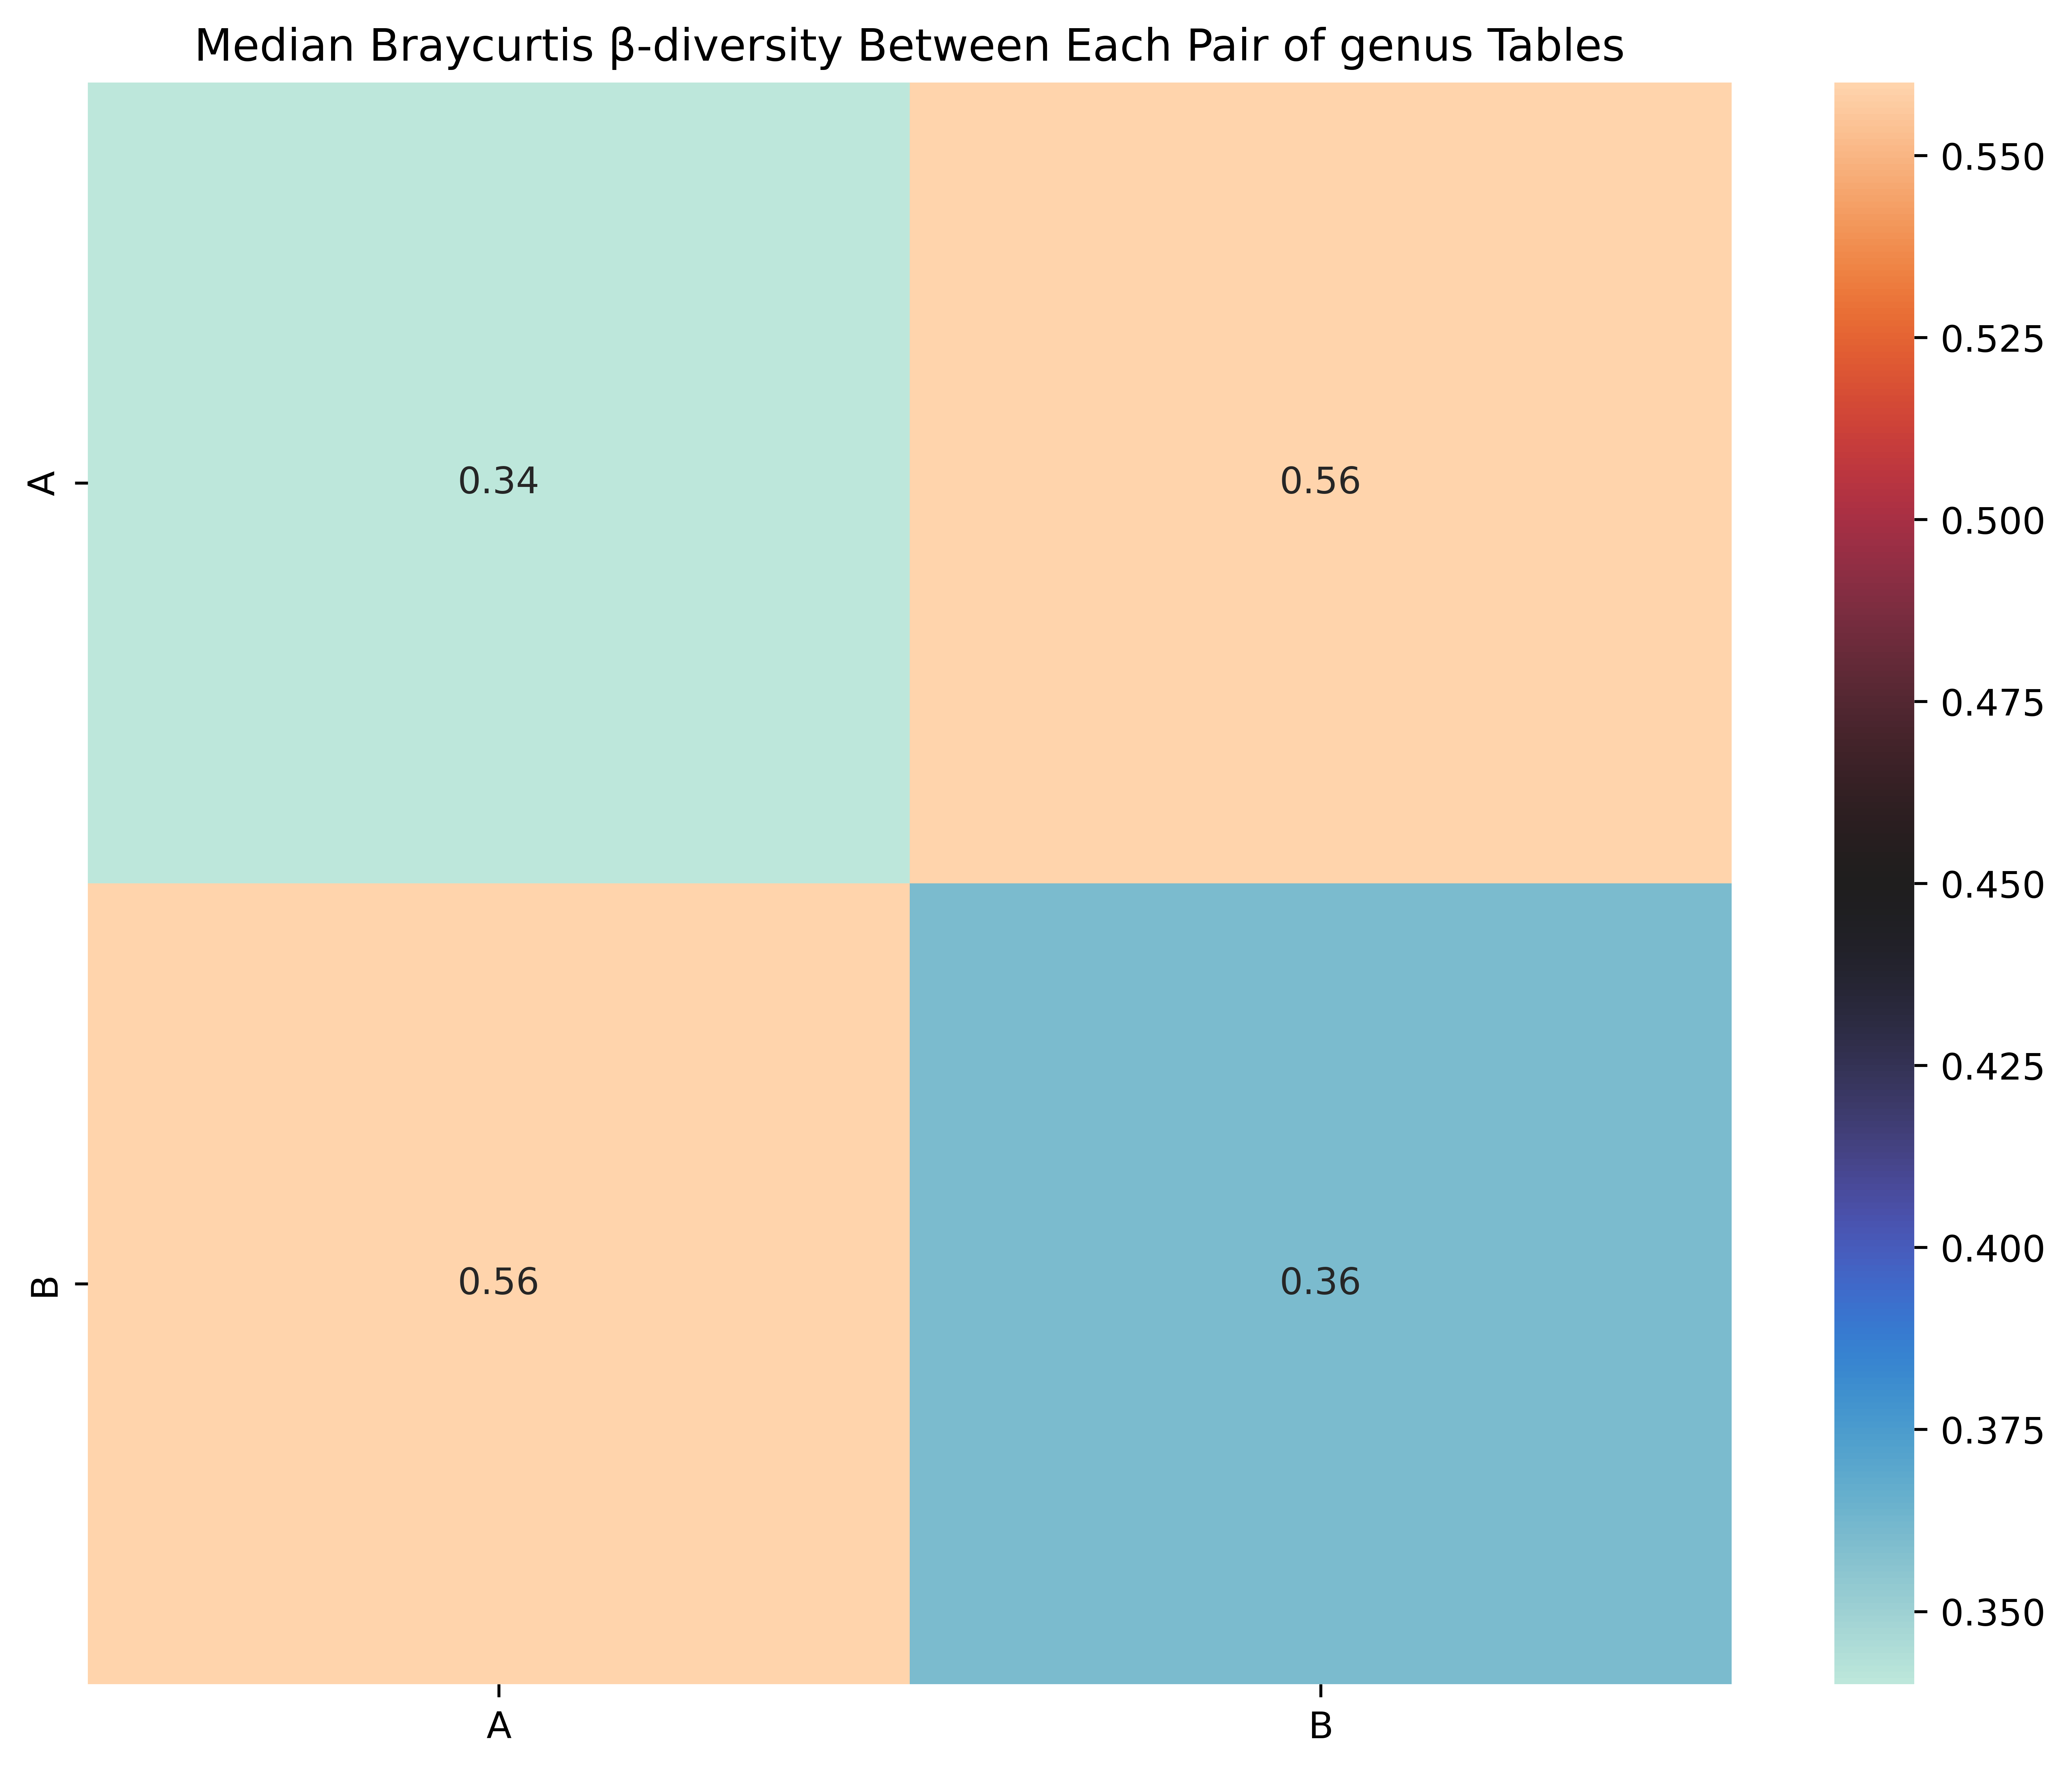

{'A': 0.3449127011702219, 'B': 0.3639142746928645}

In [8]:
analysis.compute_median_diversities(df_list, "braycurtis", "g", 0.01)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A v.s. B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.351e-02 U_stat=1.788e+04


A     B
A  0.36  0.71
B  0.71  0.38

A     B
A  0.36  0.71
B  0.71  0.38

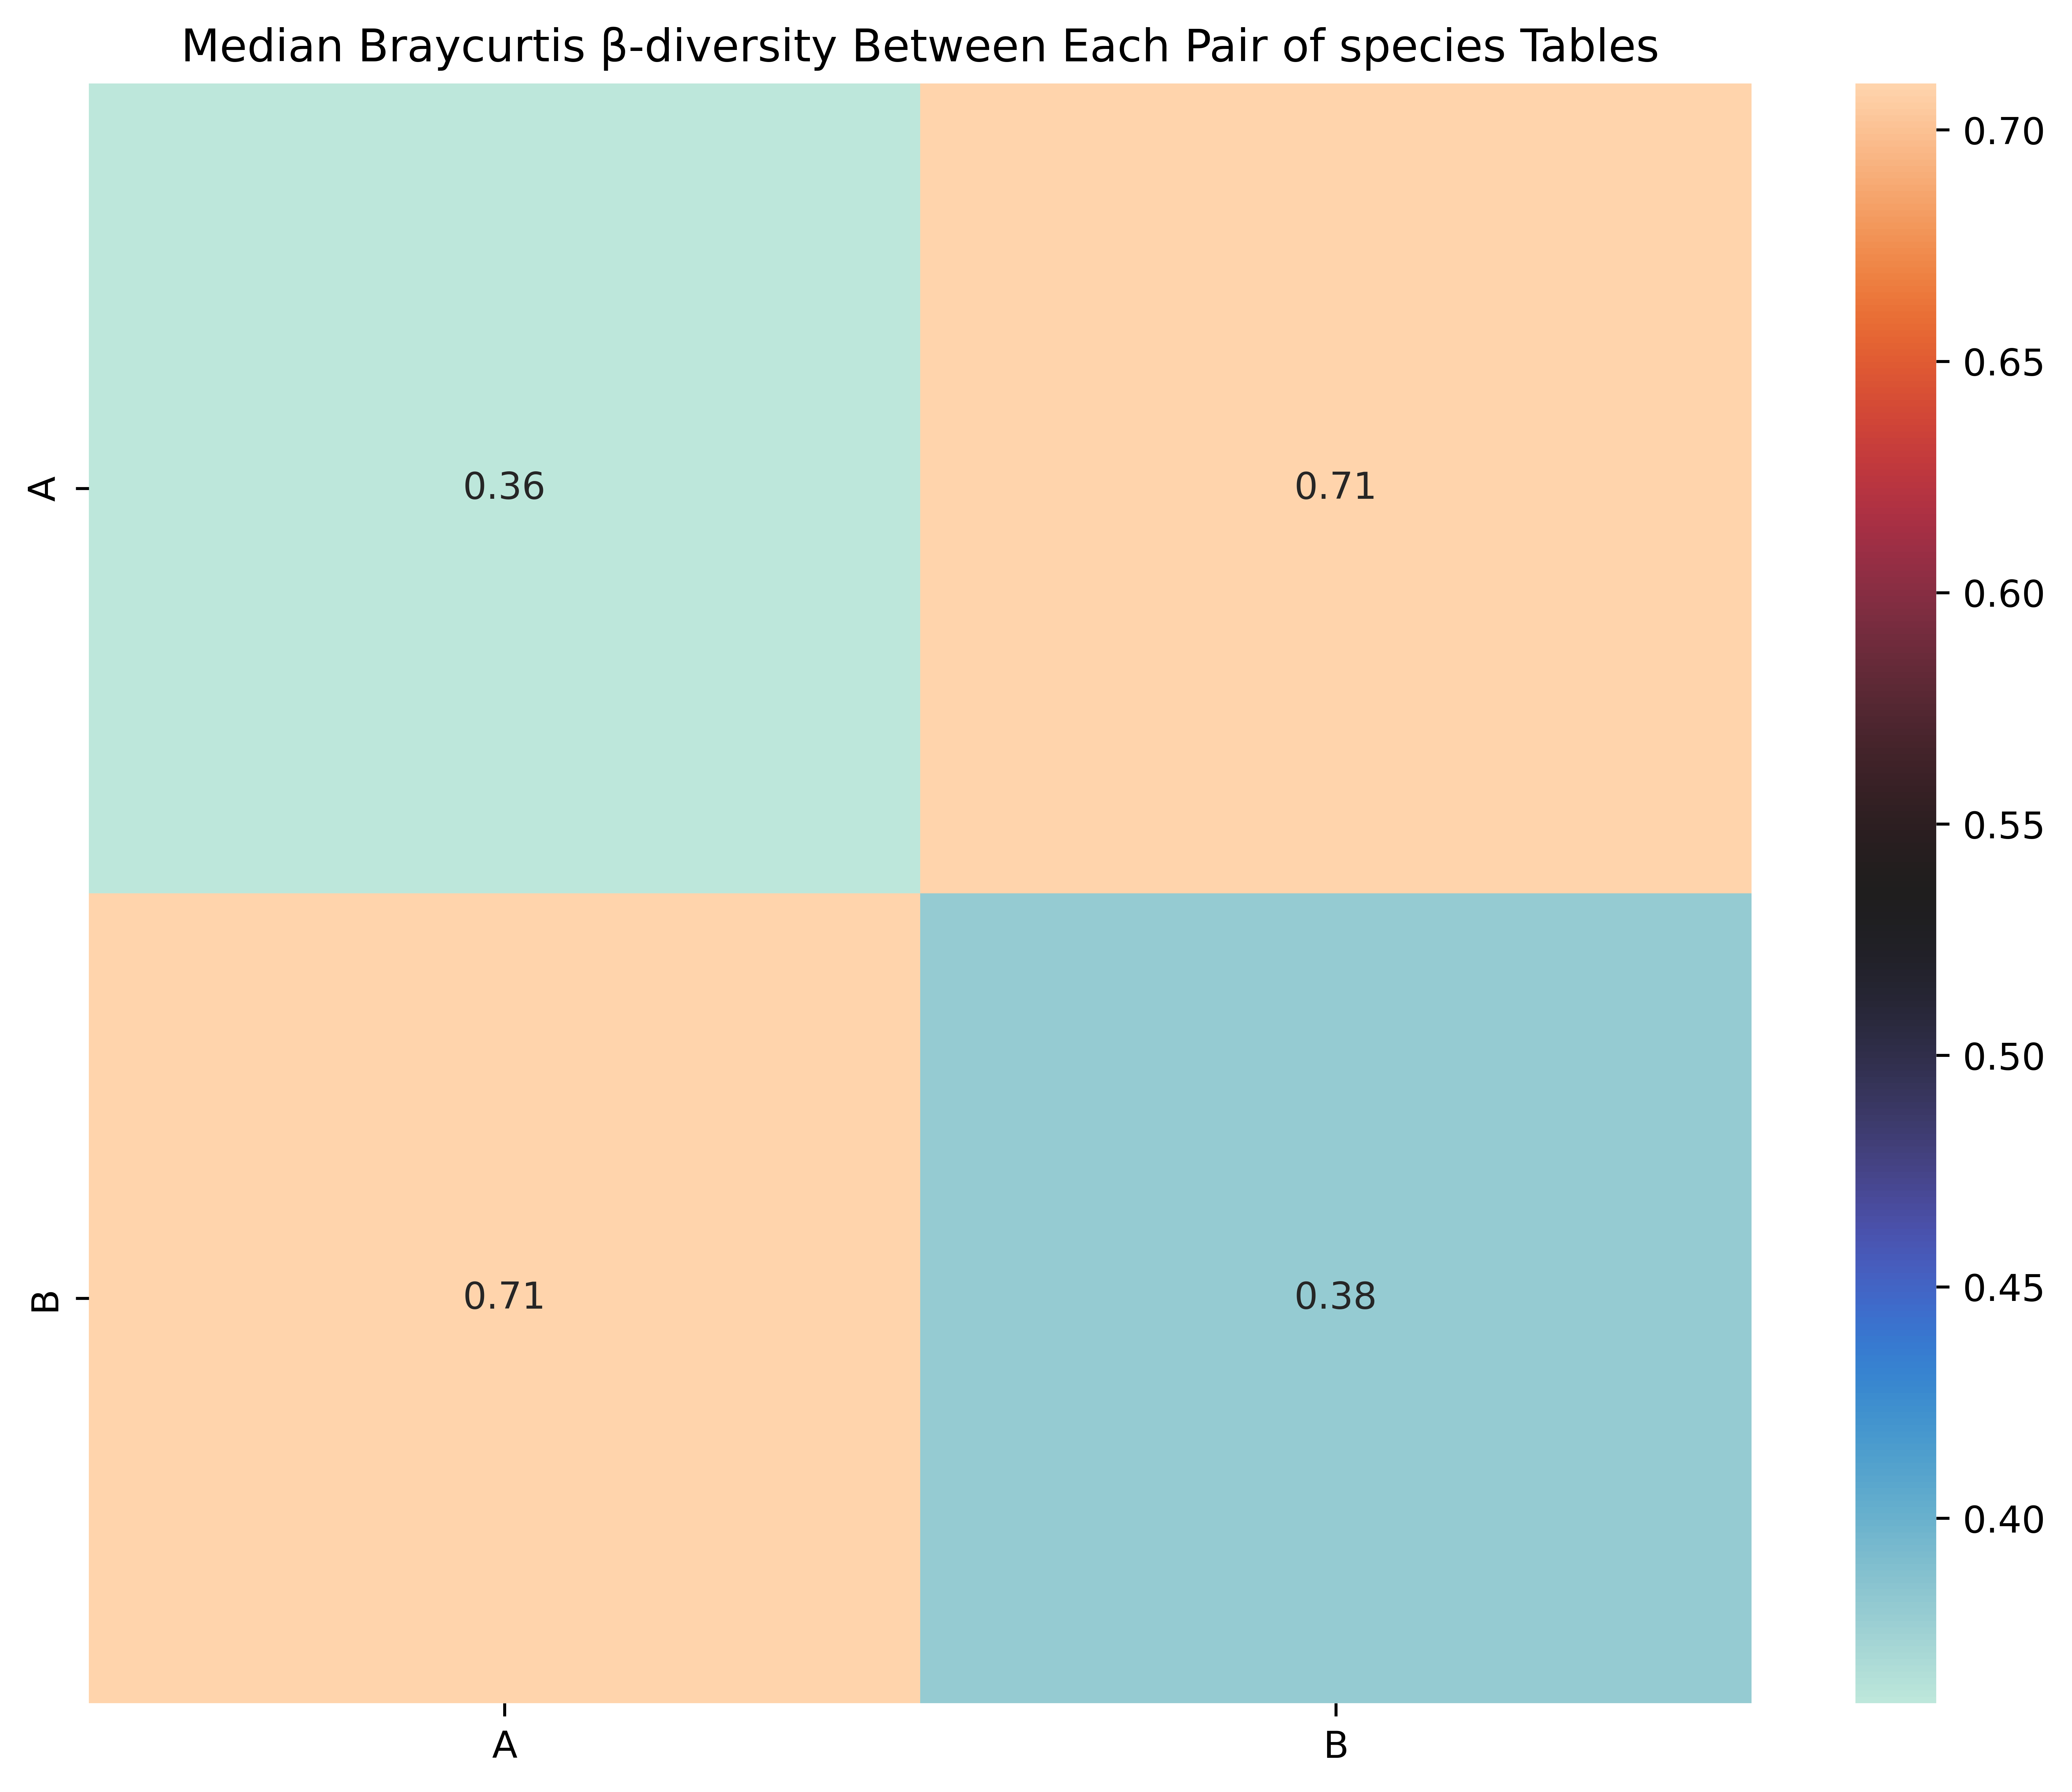

{'A': 0.35865206958206297, 'B': 0.3786638639103155}

In [9]:
analysis.compute_median_diversities(df_list, "braycurtis", "s", 0.01)

In [ ]:
analysis.compute_median_diversities(df_list, "jaccard", "g")

In [ ]:
analysis.compute_median_diversities(df_list, "jaccard", "s")

In [9]:
a_labs_dataframes = {} 
b_labs_dataframes = {}

for lab in A['Lab'].unique():
    a_labs_dataframes[f'A_{lab}'] = A[(A['sample_gro'] == "A") & (A['Lab'] == lab)]
for lab in B['Lab'].unique():    
    b_labs_dataframes[f'B_{lab}'] = B[(B['sample_gro'] == "B") & (B['Lab'] == lab)]

df_list_a = [(label, df) for label, df in a_labs_dataframes.items()]
df_list_b = [(label, df) for label, df in b_labs_dataframes.items()]

In [10]:
def compute_median_diversities(df_list, metric, TAXA_level, threshold):
    median_diversities = pd.DataFrame(np.zeros((len(df_list), len(df_list))), columns=[x[0] for x in df_list],
                                      index=[x[0] for x in df_list])

    for i in range(len(df_list)):
        for j in range(i + 1, len(df_list)):

            df_name_i, df_i = df_list[i]
            df_name_j, df_j = df_list[j]

            df_i = df_i.apply(pd.to_numeric, errors='coerce')
            df_i = df_i.where(df_i >= threshold)
            df_i = df_i.fillna(0)
            df_i = df_i.loc[:, (df_i != 0).any(axis=0)]
            df_i = df_i.sort_index(axis=1).astype(int)
            if TAXA_level == "g":
                df_i = df_i.loc[:, df_i.columns.str.startswith('g__')]
                data_i = df_i.values
            elif TAXA_level == "s":
                df_i = df_i.loc[:, df_i.columns.str.startswith('s__')]
                data_i = df_i.values

            df_j = df_j.apply(pd.to_numeric, errors='coerce')
            df_j = df_j.where(df_j >= threshold)
            df_j = df_j.fillna(0)
            df_j = df_j.loc[:, (df_j != 0).any(axis=0)]
            df_j = df_j.sort_index(axis=1).astype(int)
            if TAXA_level == "g":
                df_j = df_j.loc[:, df_j.columns.str.startswith('g__')]
                data_j = df_j.values
            elif TAXA_level == "s":
                df_j = df_j.loc[:, df_j.columns.str.startswith('s__')]
                data_j = df_j.values

            # Align df_i and df_j along the columns
            df_i, df_j = df_i.align(df_j, axis=1, fill_value=0)

            # Compute Bray-Curtis beta diversity
            dm_between = beta_diversity(metric, np.concatenate([data_i, data_j]),
                                        ids=[f"{df_name_i}_{id_}" for id_ in df_i.index]
                                            + [f"{df_name_j}_{id_}" for id_ in df_j.index])

            dm = pd.DataFrame(dm_between.data, index=dm_between.ids, columns=dm_between.ids)
            dm = dm.fillna(0)
            median_diversity = np.median(dm)
            median_diversities.loc[df_name_i, df_name_j] = median_diversity
            median_diversities.loc[df_name_j, df_name_i] = median_diversity

    plt.figure(figsize=(10, 8), dpi=800)

    if TAXA_level == 'g':
        taxa_label = 'genus'
    elif TAXA_level == 's':
        taxa_label = 'species'
    else:
        taxa_label = 'OTU'

    median_diversities_rounded = median_diversities.round(2)
    display(median_diversities_rounded)
    sns.heatmap(median_diversities_rounded, fmt='', cmap=sns.color_palette("icefire", as_cmap=True))

    plt.title(f'Median {metric.capitalize()} β-diversity Between Each Pair of {taxa_label} Tables')
    plt.show()

In [14]:
analysis.compute_alpha_diversities(df_list_a, 'g', 0.01)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

A_1 v.s. A_2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_2 v.s. A_3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_3 v.s. A_4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_4 v.s. A_5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_5 v.s. A_6: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_6 v.s. A_7: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_7 v.s. A_8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_8 v.s. A_9: Mann-Whitney-Wilcoxon test two-sided w

A_2 v.s. A_7: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_3 v.s. A_8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_4 v.s. A_9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_5 v.s. A_11: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_6 v.s. A_12: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_7 v.s. A_13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_8 v.s. A_14: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_9 v.s. A_15: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_11 v.s. A_16: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_

A_11 v.s. A_21: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_1 v.s. A_13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_2 v.s. A_14: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_3 v.s. A_15: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_4 v.s. A_16: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_5 v.s. A_17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
A_6 v.s. A_18: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_7 v.s. A_19: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
A_8 v.s. A_20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd762364820> (for post_execute):


KeyboardInterrupt: 

In [ ]:
analysis.compute_alpha_diversities(df_list_a, 's', 0.01)

In [ ]:
analysis.compute_alpha_diversities(df_list_b, 'g', 0.01)

In [ ]:
analysis.compute_alpha_diversities(df_list_b, 's', 0.01)

In [11]:
df_list = df_list_a + df_list_b

A_1   A_2   A_3   A_4   A_5   A_6   A_7   A_8   A_9  A_11  ...  B_12  \
A_1   0.00  0.06  0.24  0.11  0.20  0.21  0.17  0.24  0.24  0.19  ...  0.35   
A_2   0.06  0.00  0.25  0.08  0.18  0.19  0.12  0.23  0.23  0.17  ...  0.35   
A_3   0.24  0.25  0.00  0.23  0.36  0.34  0.32  0.36  0.38  0.17  ...  0.27   
A_4   0.11  0.08  0.23  0.00  0.19  0.16  0.14  0.25  0.23  0.18  ...  0.35   
A_5   0.20  0.18  0.36  0.19  0.00  0.11  0.10  0.21  0.13  0.31  ...  0.40   
A_6   0.21  0.19  0.34  0.16  0.11  0.00  0.09  0.22  0.12  0.31  ...  0.39   
A_7   0.17  0.12  0.32  0.14  0.10  0.09  0.00  0.22  0.16  0.26  ...  0.37   
A_8   0.24  0.23  0.36  0.25  0.21  0.22  0.22  0.00  0.20  0.34  ...  0.32   
A_9   0.24  0.23  0.38  0.23  0.13  0.12  0.16  0.20  0.00  0.35  ...  0.37   
A_11  0.19  0.17  0.17  0.18  0.31  0.31  0.26  0.34  0.35  0.00  ...  0.35   
A_12  0.32  0.33  0.22  0.33  0.41  0.40  0.38  0.33  0.39  0.33  ...  0.25   
A_13  0.14  0.09  0.29  0.09  0.16  0.15  0.12  0.23  0.21  0.22  ...  0.37   
A_14  0.19  0.18  0.35  0.17  0.11  0.08  0.10  0.23  0.15  0.31  ...  0.42   
A_15  0.23  0.21  0.37  0.18  0.10  0.07  0.11  0.20  0.08  0.33  ...  0.38   
A_16  0.13  0.10  0.27  0.16  0.21  0.22  0.16  0.28  0.28  0.20  ...  0.39   
A_17  0.08  0.07  0.22  0.09  0.20  0.20  0.15  0.22  0.23  0.17  ...  0.31   
A_18  0.29  0.27  0.42  0.24  0.10  0.12  0.16  0.23  0.12  0.39  ...  0.42   
A_19  0.13  0.10  0.30  0.08  0.13  0.14  0.10  0.21  0.18  0.22  ...  0.34   
A_20  0.13  0.12  0.22  0.16  0.27  0.28  0.22  0.30  0.32  0.11  ...  0.36   
A_21  0.11  0.08  0.22  0.08  0.23  0.24  0.17  0.27  0.27  0.11  ...  0.34   
B_1   0.28  0.27  0.28  0.27  0.32  0.30  0.28  0.32  0.32  0.30  ...  0.30   
B_2   0.29  0.26  0.30  0.25  0.29  0.27  0.25  0.30  0.30  0.32  ...  0.31   
B_3   0.30  0.30  0.23  0.29  0.40  0.38  0.36  0.36  0.40  0.29  ...  0.25   
B_4   0.31  0.29  0.33  0.28  0.28  0.24  0.24  0.29  0.25  0.36  ...  0.31   
B_5   0.34  0.32  0.40  0.31  0.27  0.24  0.25  0.29  0.25  0.39  ...  0.36   
B_6   0.31  0.28  0.31  0.27  0.29  0.23  0.24  0.31  0.27  0.33  ...  0.33   
B_7   0.34  0.32  0.38  0.30  0.28  0.23  0.24  0.30  0.26  0.38  ...  0.36   
B_8   0.40  0.38  0.44  0.39  0.35  0.34  0.33  0.30  0.32  0.44  ...  0.38   
B_9   0.35  0.33  0.42  0.33  0.29  0.26  0.27  0.31  0.23  0.42  ...  0.37   
B_10  0.41  0.39  0.46  0.39  0.34  0.30  0.31  0.32  0.30  0.46  ...  0.40   
B_11  0.35  0.35  0.27  0.34  0.44  0.42  0.40  0.41  0.44  0.29  ...  0.32   
B_12  0.35  0.35  0.27  0.35  0.40  0.39  0.37  0.32  0.37  0.35  ...  0.00   
B_13  0.32  0.30  0.37  0.29  0.26  0.23  0.23  0.28  0.24  0.38  ...  0.32   
B_14  0.35  0.33  0.39  0.31  0.27  0.22  0.24  0.31  0.26  0.40  ...  0.37   
B_15  0.37  0.34  0.42  0.33  0.29  0.24  0.26  0.32  0.25  0.41  ...  0.38   
B_16  0.30  0.29  0.28  0.29  0.33  0.32  0.31  0.35  0.35  0.29  ...  0.30   
B_17  0.30  0.30  0.32  0.31  0.32  0.32  0.30  0.31  0.33  0.36  ...  0.30   
B_18  0.35  0.33  0.39  0.30  0.28  0.24  0.24  0.31  0.26  0.40  ...  0.36   
B_19  0.30  0.28  0.32  0.28  0.31  0.30  0.27  0.28  0.30  0.35  ...  0.29   
B_20  0.33  0.33  0.28  0.32  0.41  0.39  0.37  0.41  0.41  0.31  ...  0.33   
B_21  0.29  0.26  0.28  0.26  0.32  0.31  0.29  0.34  0.33  0.29  ...  0.29   

      B_13  B_14  B_15  B_16  B_17  B_18  B_19  B_20  B_21  
A_1   0.32  0.35  0.37  0.30  0.30  0.35  0.30  0.33  0.29  
A_2   0.30  0.33  0.34  0.29  0.30  0.33  0.28  0.33  0.26  
A_3   0.37  0.39  0.42  0.28  0.32  0.39  0.32  0.28  0.28  
A_4   0.29  0.31  0.33  0.29  0.31  0.30  0.28  0.32  0.26  
A_5   0.26  0.27  0.29  0.33  0.32  0.28  0.31  0.41  0.32  
A_6   0.23  0.22  0.24  0.32  0.32  0.24  0.30  0.39  0.31  
A_7   0.23  0.24  0.26  0.31  0.30  0.24  0.27  0.37  0.29  
A_8   0.28  0.31  0.32  0.35  0.31  0.31  0.28  0.41  0.34  
A_9   0.24  0.26  0.25  0.35  0.33  0.26  0.30  0.41  0.33  
A_11  0.38  0.40  0.41  0.29  0.36  0.40  0.35  0.31  0.29  
A_12  0.37  0.41 

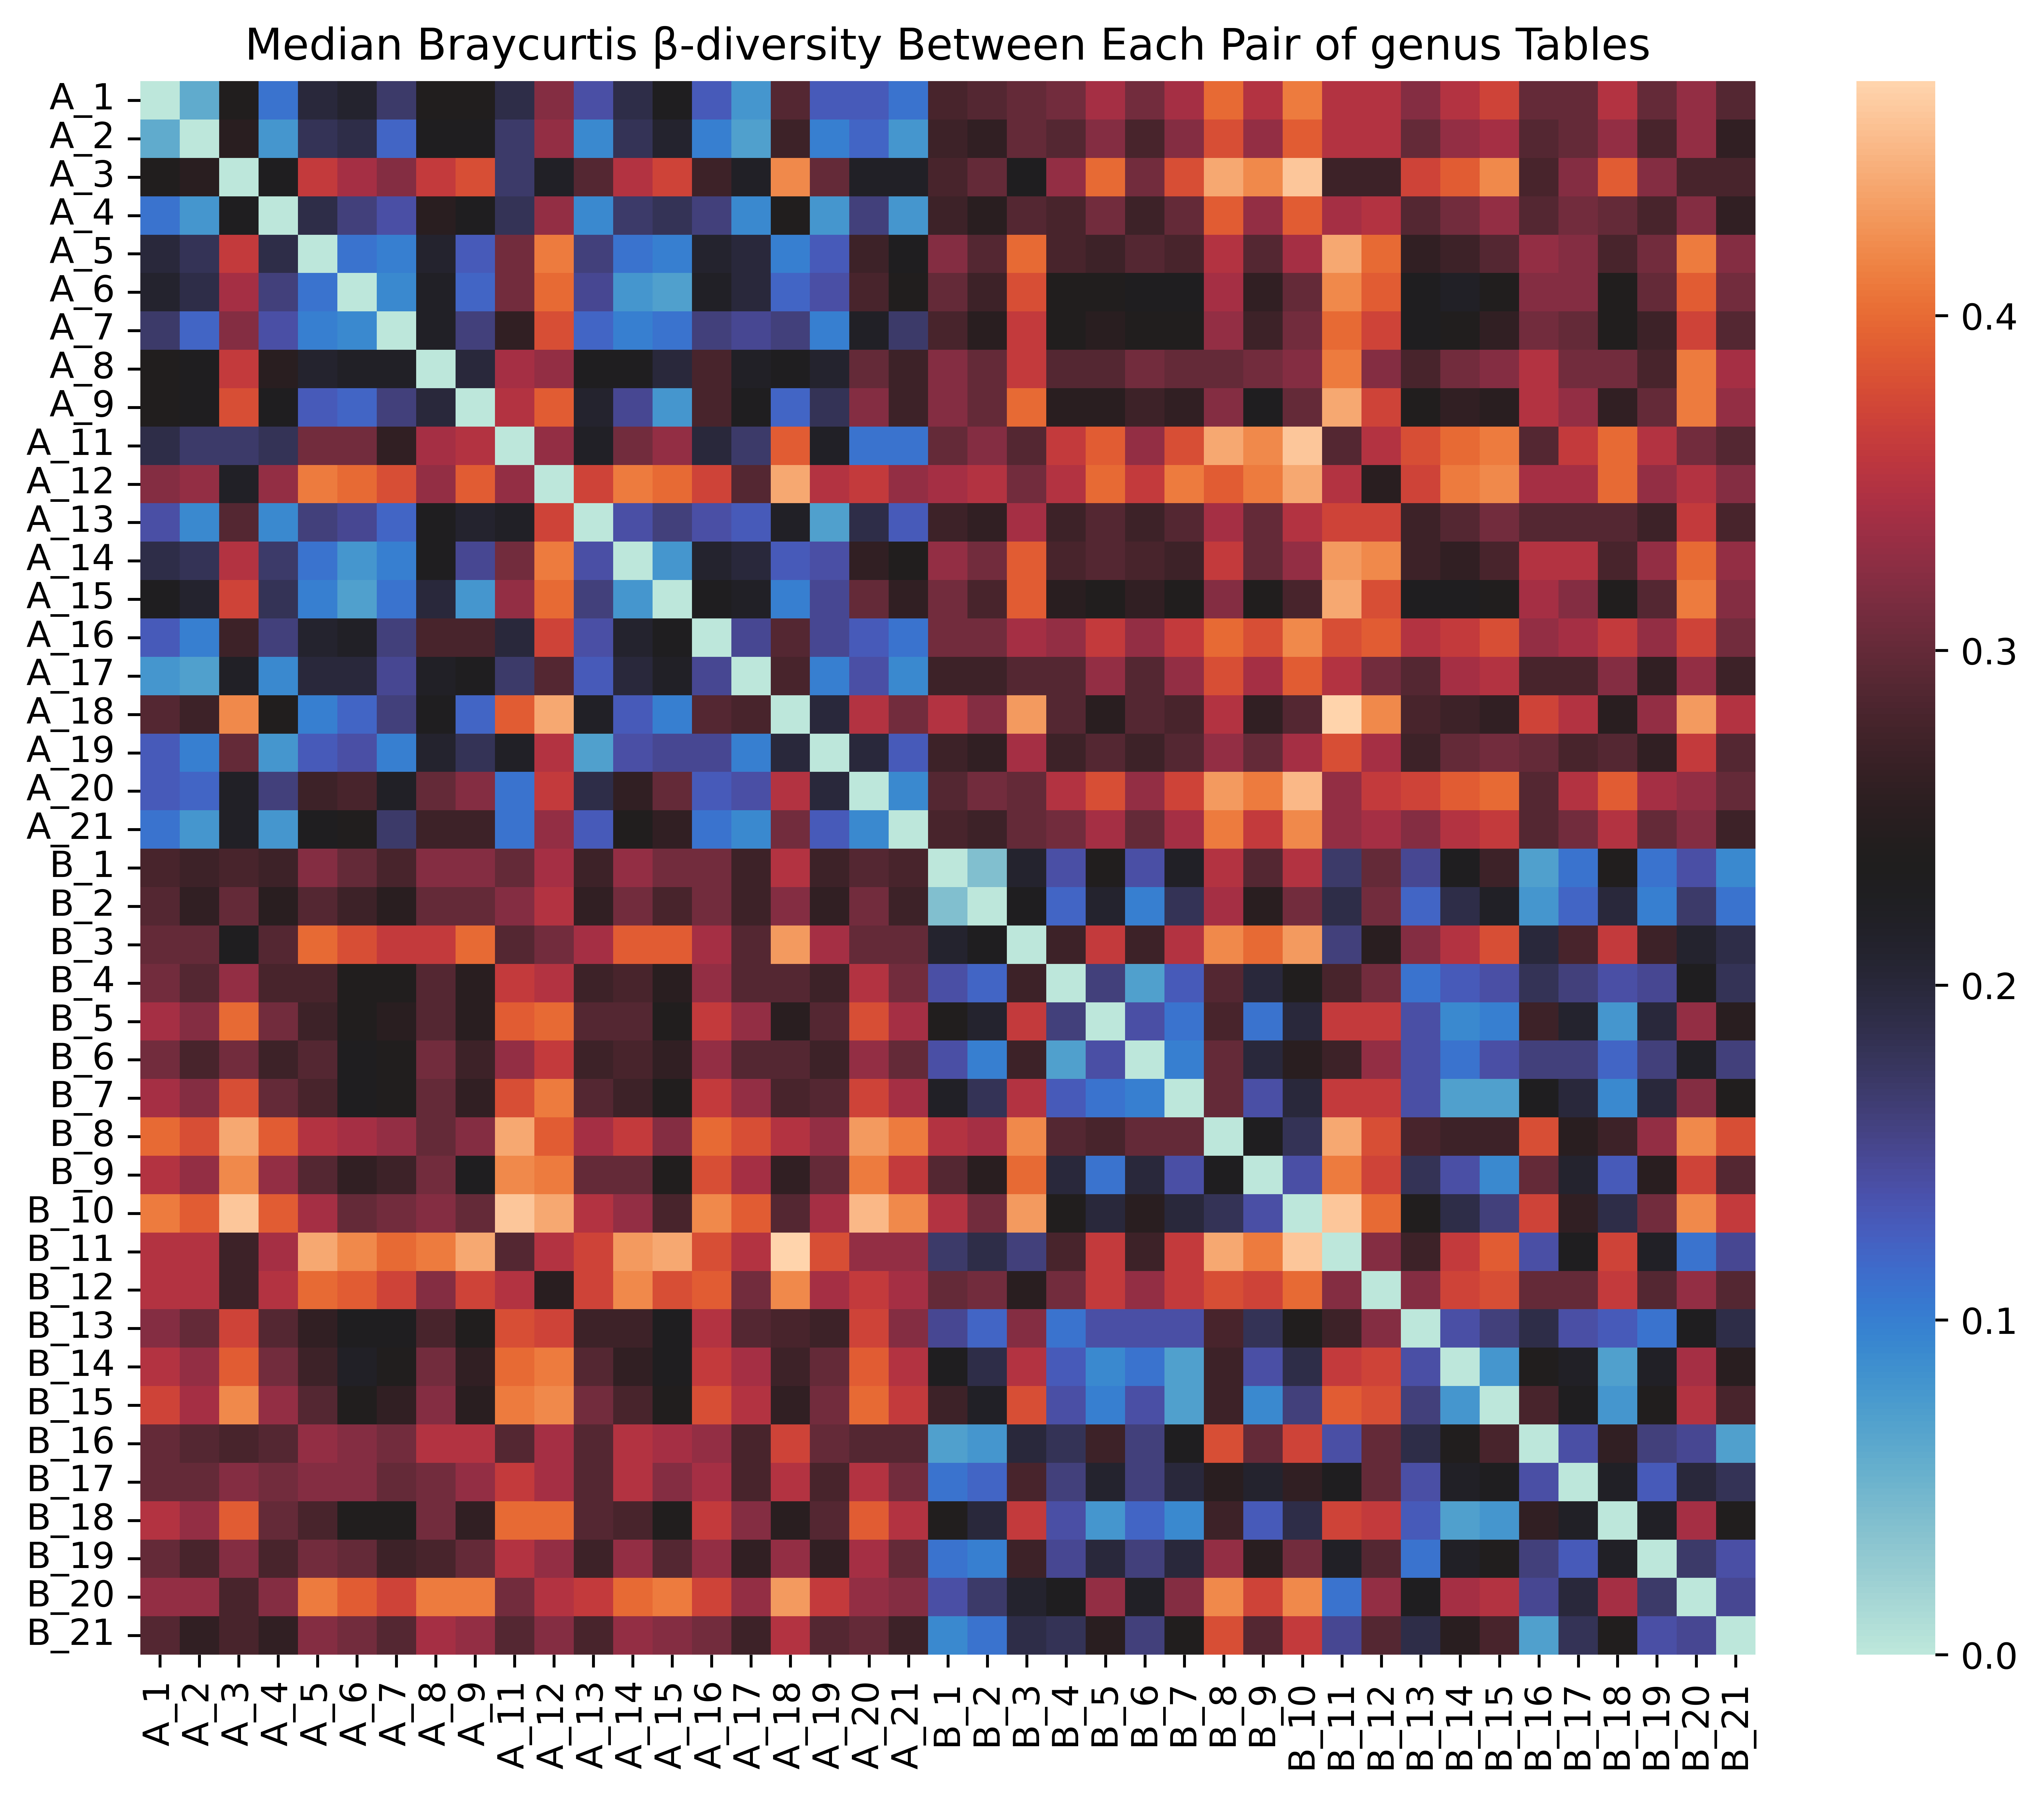

In [17]:
compute_median_diversities(df_list, "braycurtis", "g", 0.01)

A_1   A_2   A_3   A_4   A_5   A_6   A_7   A_8   A_9  A_11  ...  B_12  \
A_1   0.00  0.07  0.28  0.15  0.18  0.22  0.17  0.28  0.23  0.22  ...  0.44   
A_2   0.07  0.00  0.28  0.11  0.19  0.21  0.13  0.27  0.26  0.21  ...  0.42   
A_3   0.28  0.28  0.00  0.26  0.38  0.37  0.34  0.38  0.40  0.19  ...  0.43   
A_4   0.15  0.11  0.26  0.00  0.21  0.18  0.14  0.26  0.24  0.20  ...  0.43   
A_5   0.18  0.19  0.38  0.21  0.00  0.14  0.12  0.24  0.16  0.33  ...  0.42   
A_6   0.22  0.21  0.37  0.18  0.14  0.00  0.13  0.26  0.16  0.35  ...  0.42   
A_7   0.17  0.13  0.34  0.14  0.12  0.13  0.00  0.24  0.19  0.27  ...  0.40   
A_8   0.28  0.27  0.38  0.26  0.24  0.26  0.24  0.00  0.22  0.35  ...  0.37   
A_9   0.23  0.26  0.40  0.24  0.16  0.16  0.19  0.22  0.00  0.38  ...  0.40   
A_11  0.22  0.21  0.19  0.20  0.33  0.35  0.27  0.35  0.38  0.00  ...  0.45   
A_12  0.36  0.35  0.24  0.34  0.40  0.41  0.38  0.36  0.38  0.35  ...  0.40   
A_13  0.15  0.09  0.29  0.11  0.19  0.19  0.15  0.24  0.25  0.21  ...  0.39   
A_14  0.19  0.19  0.38  0.18  0.15  0.10  0.14  0.26  0.18  0.33  ...  0.44   
A_15  0.24  0.24  0.39  0.19  0.14  0.10  0.15  0.22  0.11  0.35  ...  0.40   
A_16  0.17  0.13  0.32  0.18  0.21  0.24  0.17  0.31  0.31  0.22  ...  0.45   
A_17  0.10  0.09  0.26  0.12  0.21  0.22  0.17  0.25  0.26  0.20  ...  0.42   
A_18  0.27  0.28  0.42  0.25  0.11  0.14  0.18  0.22  0.14  0.39  ...  0.41   
A_19  0.13  0.11  0.33  0.13  0.15  0.18  0.14  0.24  0.20  0.23  ...  0.39   
A_20  0.15  0.14  0.26  0.20  0.29  0.30  0.23  0.31  0.34  0.13  ...  0.45   
A_21  0.12  0.11  0.24  0.13  0.26  0.28  0.19  0.29  0.30  0.11  ...  0.44   
B_1   0.38  0.36  0.40  0.37  0.38  0.38  0.36  0.37  0.39  0.39  ...  0.33   
B_2   0.39  0.36  0.41  0.36  0.35  0.34  0.33  0.37  0.38  0.41  ...  0.35   
B_3   0.42  0.40  0.38  0.41  0.45  0.45  0.43  0.42  0.45  0.40  ...  0.27   
B_4   0.41  0.38  0.44  0.37  0.35  0.35  0.32  0.36  0.35  0.45  ...  0.32   
B_5   0.41  0.39  0.46  0.40  0.34  0.35  0.34  0.36  0.33  0.47  ...  0.36   
B_6   0.41  0.38  0.41  0.37  0.36  0.35  0.34  0.39  0.38  0.42  ...  0.36   
B_7   0.43  0.41  0.45  0.40  0.36  0.35  0.34  0.37  0.36  0.47  ...  0.38   
B_8   0.42  0.41  0.48  0.42  0.38  0.38  0.37  0.31  0.35  0.49  ...  0.39   
B_9   0.42  0.40  0.48  0.40  0.35  0.35  0.34  0.35  0.33  0.48  ...  0.37   
B_10  0.44  0.42  0.48  0.41  0.36  0.36  0.35  0.35  0.36  0.49  ...  0.40   
B_11  0.44  0.43  0.40  0.43  0.48  0.47  0.46  0.45  0.48  0.40  ...  0.33   
B_12  0.44  0.42  0.43  0.43  0.42  0.42  0.40  0.37  0.40  0.45  ...  0.00   
B_13  0.41  0.39  0.46  0.38  0.35  0.35  0.33  0.35  0.35  0.47  ...  0.34   
B_14  0.43  0.41  0.46  0.40  0.35  0.33  0.33  0.37  0.34  0.47  ...  0.38   
B_15  0.43  0.41  0.47  0.40  0.35  0.34  0.34  0.37  0.34  0.47  ...  0.38   
B_16  0.40  0.38  0.40  0.38  0.38  0.38  0.36  0.39  0.40  0.39  ...  0.32   
B_17  0.41  0.40  0.43  0.41  0.38  0.40  0.36  0.35  0.38  0.45  ...  0.32   
B_18  0.42  0.40  0.46  0.38  0.36  0.35  0.34  0.37  0.35  0.47  ...  0.37   
B_19  0.40  0.38  0.41  0.38  0.37  0.39  0.35  0.33  0.37  0.42  ...  0.30   
B_20  0.42  0.41  0.40  0.41  0.46  0.45  0.43  0.44  0.46  0.41  ...  0.34   
B_21  0.39  0.35  0.40  0.36  0.39  0.40  0.37  0.40  0.42  0.39  ...  0.32   

      B_13  B_14  B_15  B_16  B_17  B_18  B_19  B_20  B_21  
A_1   0.41  0.43  0.43  0.40  0.41  0.42  0.40  0.42  0.39  
A_2   0.39  0.41  0.41  0.38  0.40  0.40  0.38  0.41  0.35  
A_3   0.46  0.46  0.47  0.40  0.43  0.46  0.41  0.40  0.40  
A_4   0.38  0.40  0.40  0.38  0.41  0.38  0.38  0.41  0.36  
A_5   0.35  0.35  0.35  0.38  0.38  0.36  0.37  0.46  0.39  
A_6   0.35  0.33  0.34  0.38  0.40  0.35  0.39  0.45  0.40  
A_7   0.33  0.33  0.34  0.36  0.36  0.34  0.35  0.43  0.37  
A_8   0.35  0.37  0.37  0.39  0.35  0.37  0.33  0.44  0.40  
A_9   0.35  0.34  0.34  0.40  0.38  0.35  0.37  0.46  0.42  
A_11  0.47  0.47  0.47  0.39  0.45  0.47  0.42  0.41  0.39  
A_12  0.44  0.44 

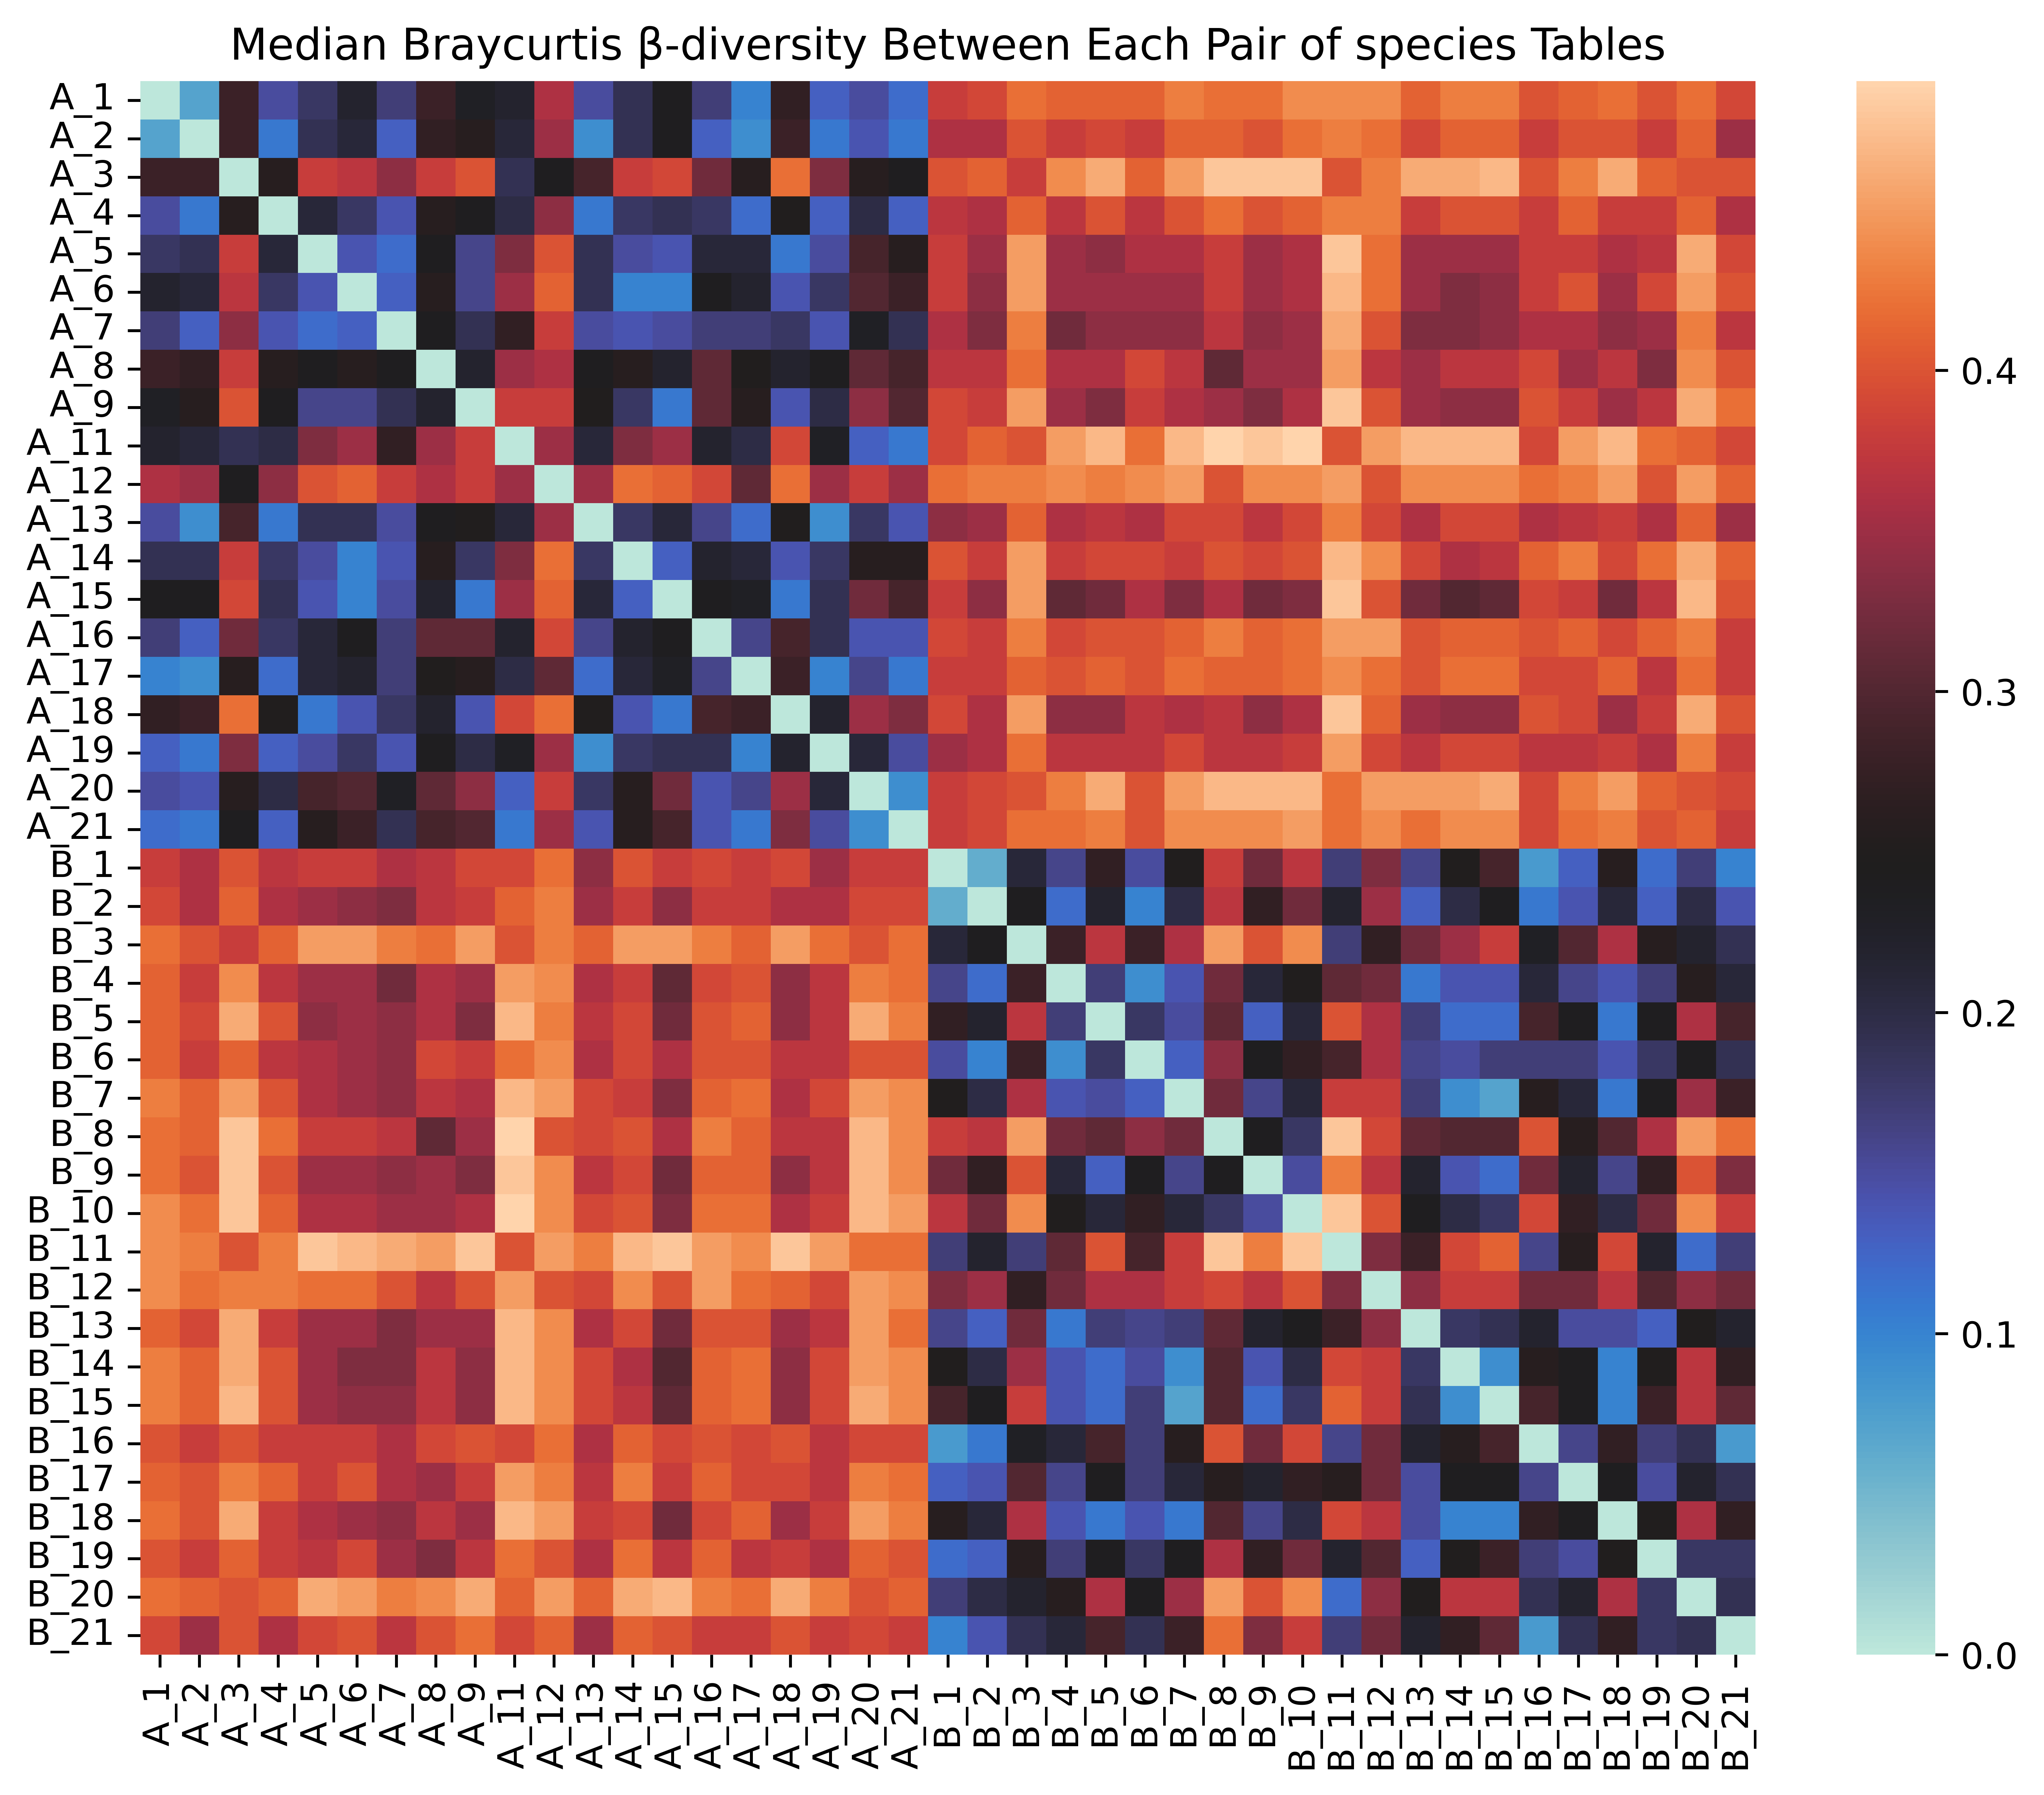

In [18]:
compute_median_diversities(df_list, "braycurtis", "s", 0.01)

In [ ]:
compute_median_diversities(df_list, "jaccard", "g", 0.01)

A_1   A_2   A_3   A_4   A_5   A_6   A_7   A_8   A_9  A_11  ...  B_12  \
A_1   0.00  0.30  0.46  0.40  0.42  0.42  0.40  0.45  0.44  0.45  ...  0.47   
A_2   0.30  0.00  0.46  0.36  0.39  0.39  0.36  0.46  0.43  0.45  ...  0.47   
A_3   0.46  0.46  0.00  0.46  0.47  0.46  0.46  0.46  0.47  0.43  ...  0.46   
A_4   0.40  0.36  0.46  0.00  0.37  0.34  0.34  0.43  0.40  0.45  ...  0.47   
A_5   0.42  0.39  0.47  0.37  0.00  0.32  0.35  0.44  0.38  0.46  ...  0.47   
A_6   0.42  0.39  0.46  0.34  0.32  0.00  0.34  0.44  0.35  0.46  ...  0.46   
A_7   0.40  0.36  0.46  0.34  0.35  0.34  0.00  0.45  0.41  0.46  ...  0.47   
A_8   0.45  0.46  0.46  0.43  0.44  0.44  0.45  0.00  0.44  0.47  ...  0.46   
A_9   0.44  0.43  0.47  0.40  0.38  0.35  0.41  0.44  0.00  0.47  ...  0.47   
A_11  0.45  0.45  0.43  0.45  0.46  0.46  0.46  0.47  0.47  0.00  ...  0.47   
A_12  0.48  0.47  0.46  0.47  0.47  0.47  0.46  0.46  0.47  0.47  ...  0.46   
A_13  0.40  0.38  0.46  0.35  0.39  0.39  0.40  0.45  0.42  0.45  ...  0.47   
A_14  0.42  0.39  0.47  0.37  0.39  0.32  0.33  0.44  0.41  0.46  ...  0.46   
A_15  0.44  0.42  0.47  0.37  0.35  0.33  0.37  0.44  0.33  0.46  ...  0.46   
A_16  0.38  0.38  0.46  0.41  0.42  0.41  0.40  0.46  0.44  0.43  ...  0.46   
A_17  0.37  0.40  0.46  0.40  0.40  0.41  0.41  0.45  0.43  0.45  ...  0.47   
A_18  0.45  0.45  0.47  0.43  0.41  0.40  0.42  0.44  0.42  0.47  ...  0.44   
A_19  0.39  0.36  0.47  0.36  0.39  0.39  0.36  0.45  0.42  0.45  ...  0.47   
A_20  0.40  0.41  0.45  0.43  0.45  0.44  0.43  0.46  0.46  0.40  ...  0.47   
A_21  0.36  0.36  0.44  0.39  0.42  0.42  0.40  0.45  0.44  0.43  ...  0.47   
B_1   0.47  0.47  0.45  0.47  0.46  0.46  0.47  0.46  0.46  0.47  ...  0.47   
B_2   0.48  0.48  0.46  0.47  0.47  0.46  0.47  0.47  0.47  0.47  ...  0.47   
B_3   0.47  0.47  0.45  0.47  0.47  0.46  0.47  0.46  0.46  0.47  ...  0.45   
B_4   0.46  0.46  0.45  0.46  0.45  0.45  0.46  0.46  0.45  0.46  ...  0.46   
B_5   0.47  0.47  0.45  0.46  0.46  0.45  0.47  0.46  0.46  0.46  ...  0.47   
B_6   0.47  0.47  0.44  0.46  0.45  0.45  0.46  0.46  0.45  0.46  ...  0.46   
B_7   0.47  0.47  0.45  0.47  0.46  0.46  0.47  0.46  0.46  0.47  ...  0.47   
B_8   0.48  0.48  0.47  0.48  0.48  0.48  0.48  0.48  0.48  0.48  ...  0.47   
B_9   0.47  0.47  0.46  0.47  0.46  0.46  0.47  0.47  0.46  0.47  ...  0.48   
B_10  0.47  0.47  0.46  0.47  0.47  0.46  0.47  0.46  0.47  0.47  ...  0.47   
B_11  0.47  0.47  0.46  0.47  0.47  0.46  0.47  0.46  0.47  0.47  ...  0.46   
B_12  0.47  0.47  0.46  0.47  0.47  0.46  0.47  0.46  0.47  0.47  ...  0.00   
B_13  0.46  0.46  0.45  0.46  0.45  0.45  0.46  0.46  0.45  0.46  ...  0.47   
B_14  0.47  0.47  0.45  0.46  0.46  0.45  0.47  0.46  0.46  0.47  ...  0.46   
B_15  0.47  0.47  0.45  0.46  0.46  0.45  0.46  0.46  0.46  0.47  ...  0.47   
B_16  0.47  0.47  0.45  0.47  0.46  0.45  0.46  0.46  0.46  0.46  ...  0.47   
B_17  0.48  0.48  0.46  0.47  0.47  0.46  0.47  0.46  0.47  0.47  ...  0.48   
B_18  0.47  0.47  0.45  0.47  0.46  0.45  0.47  0.47  0.46  0.46  ...  0.47   
B_19  0.47  0.47  0.46  0.47  0.46  0.46  0.47  0.46  0.47  0.47  ...  0.47   
B_20  0.47  0.47  0.45  0.47  0.46  0.46  0.46  0.46  0.46  0.46  ...  0.47   
B_21  0.47  0.47  0.45  0.47  0.46  0.45  0.47  0.46  0.46  0.46  ...  0.47   

      B_13  B_14  B_15  B_16  B_17  B_18  B_19  B_20  B_21  
A_1   0.46  0.47  0.47  0.47  0.48  0.47  0.47  0.47  0.47  
A_2   0.46  0.47  0.47  0.47  0.48  0.47  0.47  0.47  0.47  
A_3   0.45  0.45  0.45  0.45  0.46  0.45  0.46  0.45  0.45  
A_4   0.46  0.46  0.46  0.47  0.47  0.47  0.47  0.47  0.47  
A_5   0.45  0.46  0.46  0.46  0.47  0.46  0.46  0.46  0.46  
A_6   0.45  0.45  0.45  0.45  0.46  0.45  0.46  0.46  0.45  
A_7   0.46  0.47  0.46  0.46  0.47  0.47  0.47  0.46  0.47  
A_8   0.46  0.46  0.46  0.46  0.46  0.47  0.46  0.46  0.46  
A_9   0.45  0.46  0.46  0.46  0.47  0.46  0.47  0.46  0.46  
A_11  0.46  0.47  0.47  0.46  0.47  0.46  0.47  0.46  0.46  
A_12  0.45  0.45 

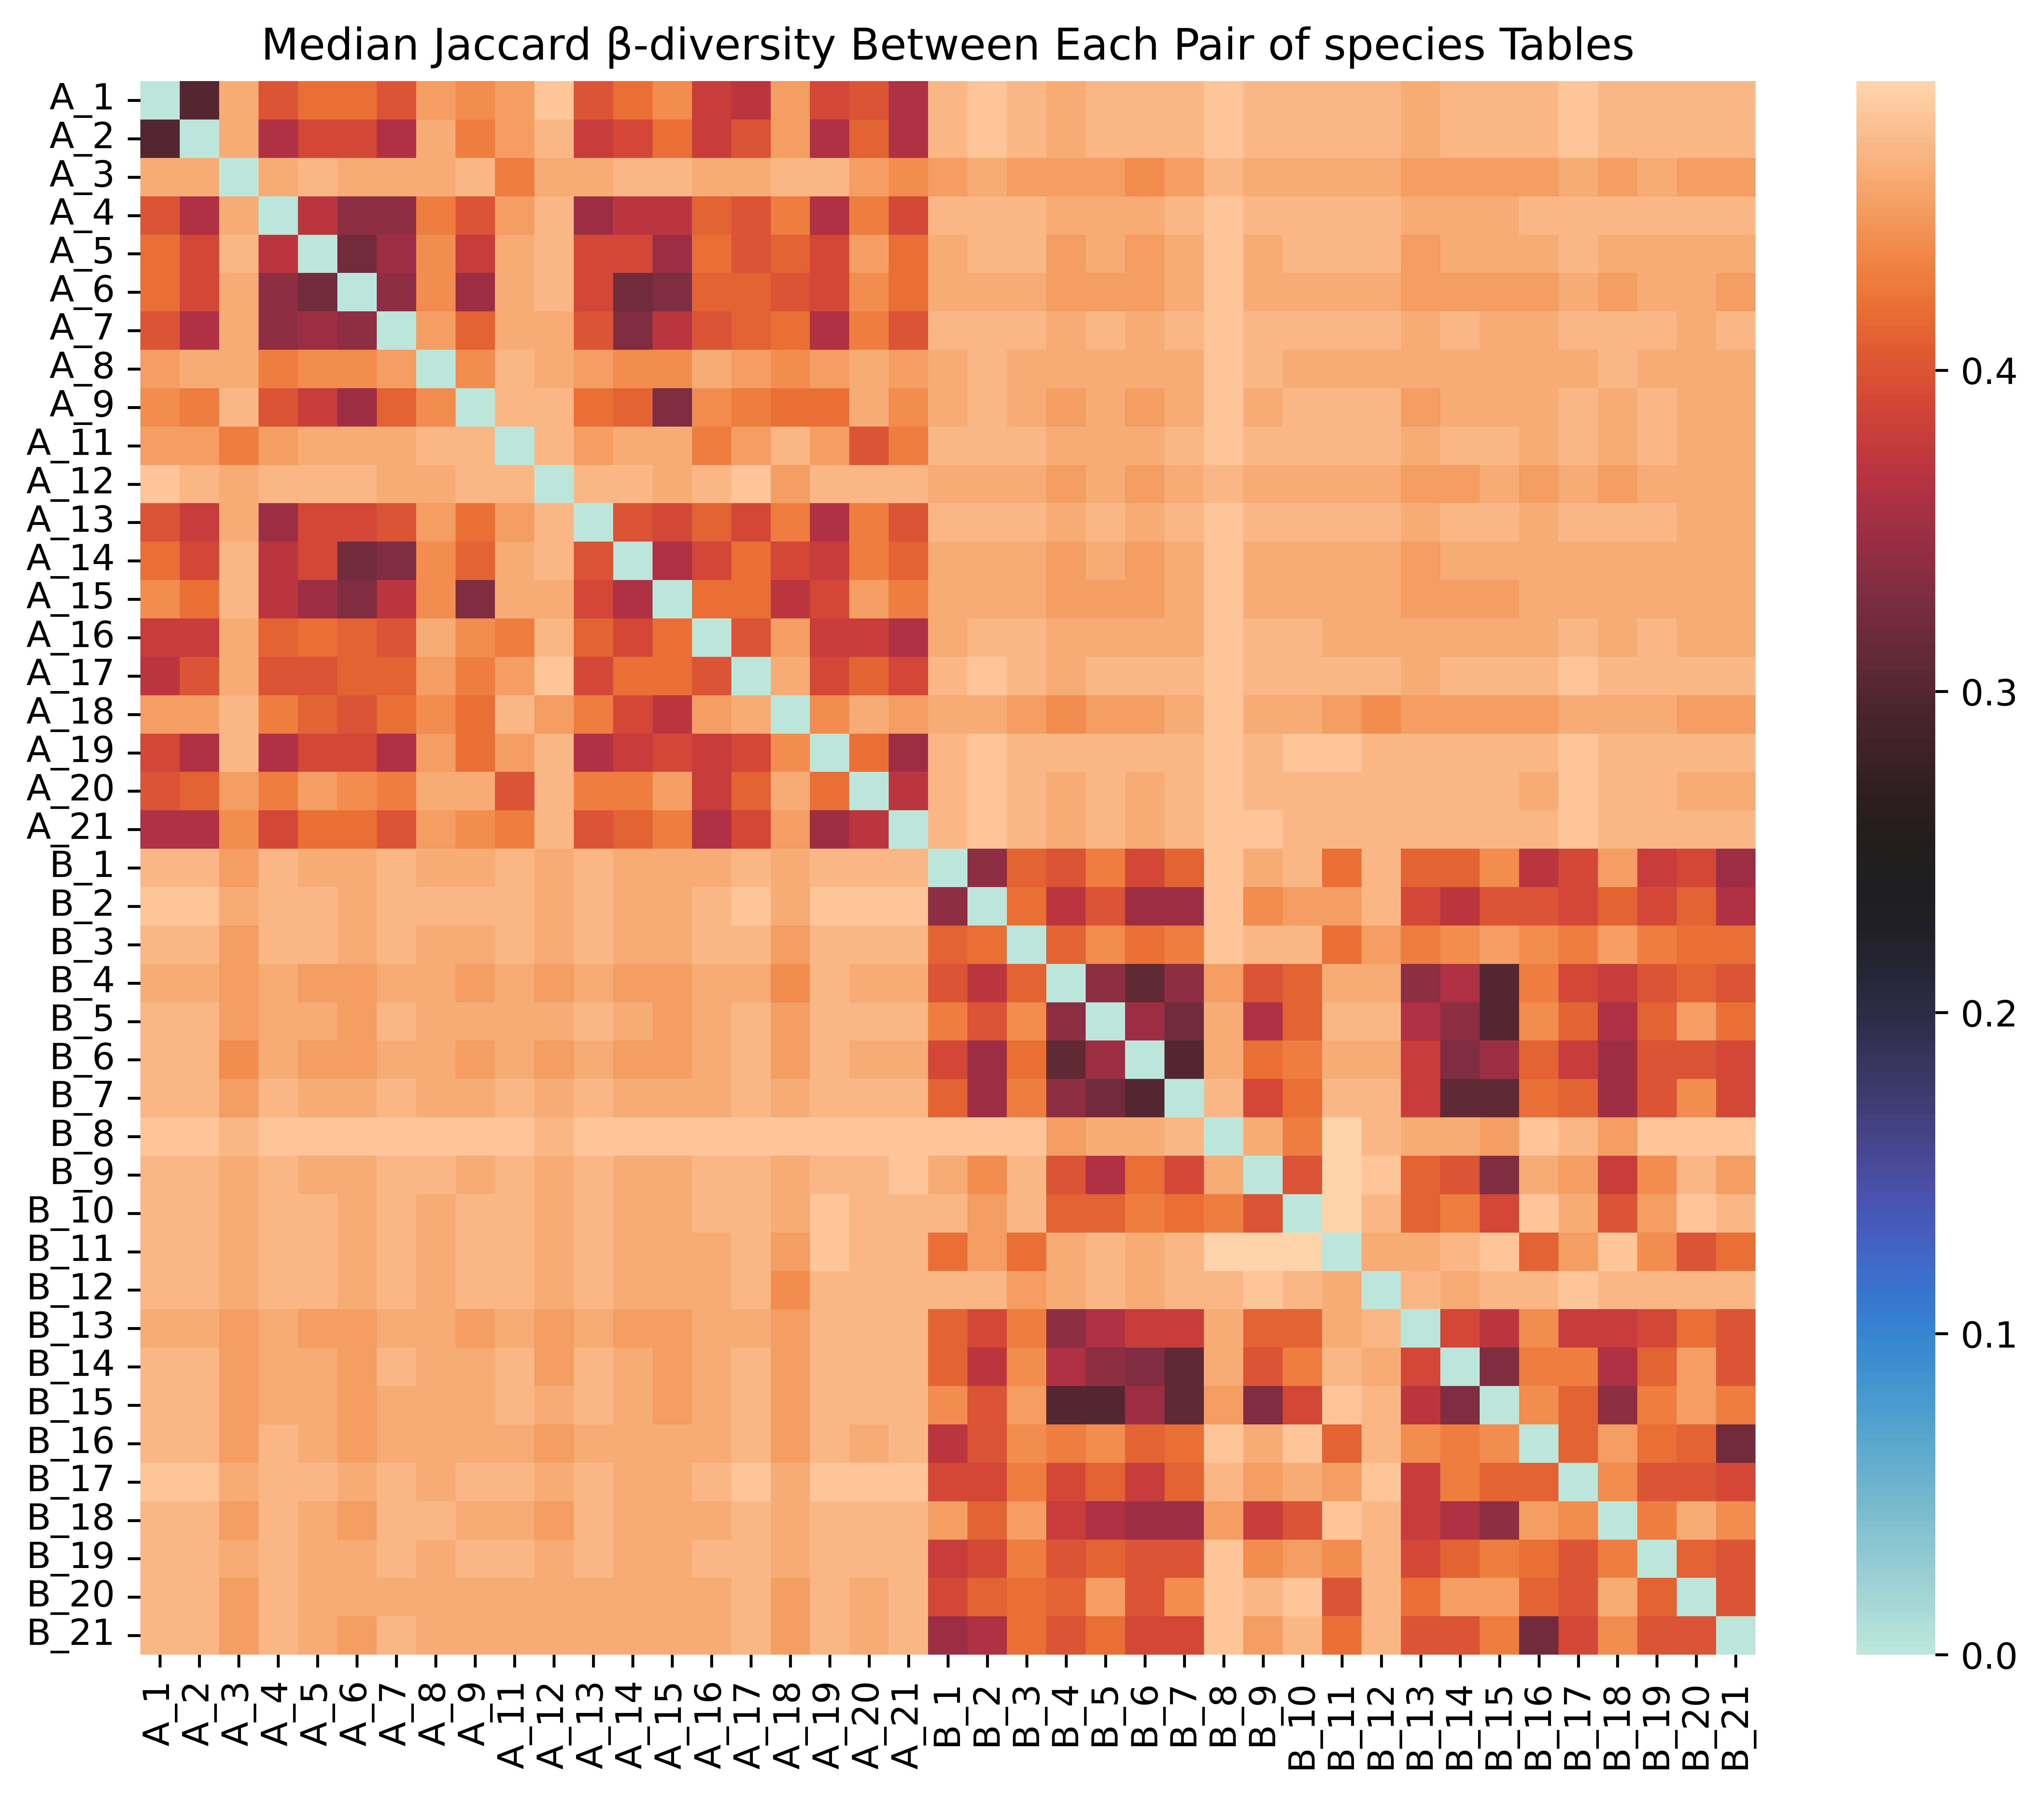

In [12]:
compute_median_diversities(df_list, "jaccard", "s", 0.01)

In [ ]:
compute_median_diversities(df_list, "jaccard", "s", 1)

In [ ]:
path_mp4_files = "/home/odeds/metaanalysis/Rarefaction/Code/CALCULATE_THRESHOLD/Test_thresh_reads/Summray_5M/"
# Search for all csv files in that path
csv_files = glob.glob(os.path.join(path_mp4_files, '**', '*.csv'), recursive=True)

df_dict_thresh = {}

for file in csv_files:
    thresh_file = file.split("_")[-1].rstrip('.csv')
    process_type = file.split("_")[-2] 

    df = pd.read_csv(file)   

    df['thresh_file'] = thresh_file
    df["process_type"] = process_type

    # If the threshold file is '5M' and "index" is in columns, modify the index column
    if thresh_file == '5M' and "index" in df.columns:
        df["index"] = [index.split(".")[-1] for index in df["index"]]
    
    if 'index' in df.columns:
        df.set_index('index', inplace=True)

    key_thresh = (thresh_file, process_type)
    df_dict_thresh[key_thresh] = df

# Combine all dataframes in the dictionary into a single dataframe
df_combined_5M = pd.concat(df_dict_thresh.values(), ignore_index=True)

df_combined_5M

In [ ]:
COLORS = ["#005f73","#0a9396","#94d2bd","#e9d8a6","#ee9b00","#ca6702","#bb3e03","#ae2012","#9b2226"]

plt.figure(figsize=(16, 9), dpi=100) 
sns.set_palette(COLORS)
scatter_plot = sns.scatterplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file')

plt.xlabel('Similarity')
plt.ylabel('Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

# Ordering the legend
handles, labels = scatter_plot.get_legend_handles_labels()
order = [labels.index(x) for x in sorted(labels)]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Threshold')

plt.show()


In [ ]:
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)
lm = sns.lmplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file', height=6, aspect=10/6, legend=False)

lm.set_axis_labels('Similarity', 'Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

# Extracting handles and labels for the legend.
handles, labels = lm._legend_data.values(), list(lm._legend_data.keys())
handles = list(handles)

# Sorting labels and corresponding handles.
sorted_labels = sorted(labels)
sorted_handles = [handles[labels.index(label)] for label in sorted_labels]

# Calculating r^2 values for each 'thresh_file' 
legend_labels = []
for label in sorted_labels:
    subset = df_combined[df_combined['thresh_file'] == label]
    regression = linregress(subset['jaccard_scores'], subset['Dissimilarity'])
    r_squared = regression.rvalue ** 2
    legend_labels.append(f'{label} (R^2 = {r_squared:.2f})')

sorted_handles = [handles[labels.index(label.split(' (')[0])] for label in legend_labels]
plt.legend(sorted_handles, legend_labels, title='Threshold', bbox_to_anchor=(1.05, 1), loc=2, frameon=False, borderaxespad=0.)

plt.show()


In [ ]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)  
sns.boxplot(data=df_combined, x='thresh_file', y='jaccard_scores',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Similarity')
plt.title('Jaccard Scores by Threshold')
plt.show()

In [ ]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100) 
sns.boxplot(data=df_combined, x='thresh_file', y='Dissimilarity',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Dissimilarity')
plt.title('Bray-Curtis by Threshold')
plt.show()

In [ ]:
path_mp4_files = "/home/odeds/metaanalysis/Rarefaction/Code/CALCULATE_THRESHOLD/Test_thresh_reads/Summray_10M/"
csv_files = glob.glob(os.path.join(path_mp4_files, '**', '*.csv'), recursive=True)

df_dict_thresh = {}

for file in csv_files:
    thresh_file = file.split("_")[-1].rstrip('.csv')
    process_type = file.split("_")[-2]  

    df = pd.read_csv(file)   

    df['thresh_file'] = thresh_file
    df["process_type"] = process_type

    # If the threshold file is '10M' and "index" is in columns, modify the index column
    if thresh_file == '10M' and "index" in df.columns:
        df["index"] = [index.split(".")[-1] for index in df["index"]]
    
    if 'index' in df.columns:
        df.set_index('index', inplace=True)

    key_thresh = (thresh_file, process_type)
    df_dict_thresh[key_thresh] = df

# Combine all dataframes in the dictionary into a single dataframe
df_combined_10M = pd.concat(df_dict_thresh.values(), ignore_index=True)

df_combined_10M

In [ ]:
plt.figure(figsize=(16, 9), dpi=100) 
sns.set_palette(COLORS)
scatter_plot = sns.scatterplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file')

plt.xlabel('Similarity')
plt.ylabel('Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

handles, labels = scatter_plot.get_legend_handles_labels()
order = [labels.index(x) for x in sorted(labels)]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Threshold')

plt.show()

In [ ]:
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)
lm = sns.lmplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file', height=6, aspect=10/6, legend=False)

lm.set_axis_labels('Similarity', 'Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

# Calculating r^2 values for each 'thresh_file' 
legend_labels = []
for label in sorted_labels:
    subset = df_combined[df_combined['thresh_file'] == label]
    regression = linregress(subset['jaccard_scores'], subset['Dissimilarity'])
    r_squared = regression.rvalue ** 2
    legend_labels.append(f'{label} (R^2 = {r_squared:.2f})')

sorted_handles = [handles[labels.index(label.split(' (')[0])] for label in legend_labels]
plt.legend(sorted_handles, legend_labels, title='Threshold', bbox_to_anchor=(1.05, 1), loc=2, frameon=False, borderaxespad=0.)

plt.show()


In [ ]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)  
sns.boxplot(data=df_combined, x='thresh_file', y='jaccard_scores',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Similarity')
plt.title('Jaccard Scores by Threshold')
plt.show()

In [ ]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100) 
sns.boxplot(data=df_combined, x='thresh_file', y='Dissimilarity',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Dissimilarity')
plt.title('Bray-curtis by Threshold')
plt.show()

In [ ]:
final_df = pd.concat([df_combined_5M, df_combined_10M], axis = 0)
# Group by 'thresh_file' and 'process_type', then calculate the mean for each group
final_df = final_df.groupby(['thresh_file', 'process_type']).mean().reset_index()
final_df['numeric_index'] = final_df['process_type'].str.rstrip('M').astype(float)
final_df = final_df.sort_values(by=['thresh_file', 'numeric_index']).reset_index(drop=True)
final_df.drop('numeric_index', axis=1, inplace=True)
final_df


In [ ]:
# Assuming df is your DataFrame
df = final_df
thresholds = ['0', '0.001', '0.01', '0.1', '1']
COLORS = ["#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=9)

for thresh in thresholds:
    df_thresh = df[df['thresh_file'] == thresh]

    if df_thresh.empty:
        print(f"No data available for threshold {thresh}")
        continue

    # Normalizer for colors
    NUMBERS = df_thresh['jaccard_scores'].values
    norm = mpl.colors.Normalize(vmin=NUMBERS.min(), vmax=NUMBERS.max())
    smappable = ScalarMappable(norm=norm, cmap=cmap)
    COLORS = smappable.to_rgba(NUMBERS)

    # Initialize layout in polar coordinates
    fig, ax = plt.subplots(figsize=(8, 16), subplot_kw={"projection": "polar"}, dpi=200)
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    ax.set_theta_offset(1.2 * np.pi / 2)
    min_ground_truth = df_thresh['jaccard_scores'].min()
    max_ground_truth = df_thresh['jaccard_scores'].max()
    ax.set_ylim(min_ground_truth, max_ground_truth)
    ax.set_yscale('symlog', linthresh=100)

    # Set the y-ticks and customize the labels
    y_ticks = np.linspace(min_ground_truth, max_ground_truth, 11)
    ax.set_rticks(y_ticks)
    ax.set_yticklabels(np.around(np.linspace(0, 1, len(y_ticks)), 1))
    ax.set_rlabel_position(22)
    ax.set_yticklabels([])

    # Add bars for 'Ground_truth'
    ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_thresh), endpoint=False)
    LENGTHS = df_thresh['jaccard_scores'].values * 80
    ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.5, width=0.3, zorder=11, label='Jaccard-index similarity score')

    # Add dashed vertical lines
    ax.vlines(ANGLES, 0, 200, color="#1f1f1f", ls=(0, (4, 4)), zorder=11)

    # Add dots for 'Species_mean'
    MEAN_GAIN = df_thresh['jaccard_scores'].values
    ax.scatter(ANGLES, MEAN_GAIN, s=80, color=COLORS, zorder=11, label='Species counts')

    # Add labels for the regions
    REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in df_thresh['process_type'].values]
    ax.set_xticks(ANGLES)
    ax.set_xticklabels(REGION, size=12)
    ax.set_yticks(np.arange(0, 200, step=20))
    
    # Add scale starting at 1M and ending at 45M
    PAD = 10
    ax.text(-0.75 * np.pi / 2, 10 + PAD, "40", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 30 + PAD, "60", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 50 + PAD, "80", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 100 + PAD, "100", ha="right", size=10)

    ax.text(0.25 * np.pi / 2, 10 + PAD, "0.4", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 30 + PAD, "0.6", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 50 + PAD, "0.8", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 70 + PAD, "1.0", ha="right", size=10)


    # Add custom legend with adjusted position
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Number of species (%)', markerfacecolor='gray', markersize=12)]
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize='small')

    # Add color legend with adjusted size and padding
    cbar = plt.colorbar(smappable, ax=ax, orientation='vertical', fraction=0.05, pad=0.1)
    cbar.set_label('Jaccard score')

    # Add title and subtitle at the top of the chart
    plt.title(f'Jaccard score Similarity\n Threshold: {thresh} %', style='italic', size=14, pad=85)

    # Adjust the layout to prevent overlap and clipping
    plt.tight_layout()

    # Display the chart
    plt.show()


In [ ]:
# Assuming df is your DataFrame
df = final_df
thresholds = ['0', '0.001', '0.01', '0.1', '1']
COLORS = ["#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=9)

for thresh in thresholds:
    df_thresh = df[df['thresh_file'] == thresh]

    if df_thresh.empty:
        print(f"No data available for threshold {thresh}")
        continue

    # Normalizer for colors
    NUMBERS = df_thresh['Dissimilarity'].values
    norm = mpl.colors.Normalize(vmin=NUMBERS.min(), vmax=NUMBERS.max())
    smappable = ScalarMappable(norm=norm, cmap=cmap)
    COLORS = smappable.to_rgba(NUMBERS)

    # Initialize layout in polar coordinates
    fig, ax = plt.subplots(figsize=(8, 16), subplot_kw={"projection": "polar"}, dpi=200)
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    ax.set_theta_offset(1.2 * np.pi / 2)
    min_ground_truth = df_thresh['Dissimilarity'].min()
    max_ground_truth = df_thresh['Dissimilarity'].max()
    ax.set_ylim(min_ground_truth, max_ground_truth)
    ax.set_yscale('symlog', linthresh=100)

    # Set the y-ticks and customize the labels
    y_ticks = np.linspace(min_ground_truth, max_ground_truth, 11)
    ax.set_rticks(y_ticks)
    ax.set_yticklabels(np.around(np.linspace(0, 1, len(y_ticks)), 1))
    ax.set_rlabel_position(22)
    ax.set_yticklabels([])

    # Add bars for 'Ground_truth'
    ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_thresh), endpoint=False)
    LENGTHS = df_thresh['jaccard_scores'].values * 100
    ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.5, width=0.3, zorder=11, label='Bray-curtis similarity score')

    # Add dashed vertical lines
    ax.vlines(ANGLES, 0, 200, color="#1f1f1f", ls=(0, (4, 4)), zorder=11)

    # Add dots for 'Species_mean'
    MEAN_GAIN = df_thresh['Dissimilarity'].values
    ax.scatter(ANGLES, MEAN_GAIN, s=80, color=COLORS, zorder=11, label='Species counts')

    # Add labels for the regions
    REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in df_thresh['process_type'].values]
    ax.set_xticks(ANGLES)
    ax.set_xticklabels(REGION, size=12)
    ax.set_yticks(np.arange(0, 200, step=20))
    
    # Add scale starting at 1M and ending at 45M
    PAD = 10
    ax.text(-0.75 * np.pi / 2, 10 + PAD, "40", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 30 + PAD, "60", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 50 + PAD, "80", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 100 + PAD, "100", ha="right", size=10)

    ax.text(0.25 * np.pi / 2, 10 + PAD, "0.4", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 30 + PAD, "0.6", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 50 + PAD, "0.8", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 70 + PAD, "1.0", ha="right", size=10)


    # Add custom legend with adjusted position
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Number of species (%)', markerfacecolor='gray', markersize=12)]
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize='small')

    # Add color legend with adjusted size and padding
    cbar = plt.colorbar(smappable, ax=ax, orientation='vertical', fraction=0.05, pad=0.1)
    cbar.set_label('Bray-curtis score')

    # Add title and subtitle at the top of the chart
    plt.title(f'Bray-curtis Dissimilarity\n Threshold: {thresh} %', style='italic', size=14, pad=85)

    # Adjust the layout to prevent overlap and clipping
    plt.tight_layout()

    # Display the chart
    plt.show()
